In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('be21b004_BT5441_Makeup_RawData.csv')

In [4]:
raw_data

,Clone,Media,Day,Time,VCD (10^6 cells/mL),Viablity,Titer (mg/L),Ammonia (g/L),Potassium (g/L),Glucose (g/L),...,Gly (mg/L),Arg (mg/L),Thr (mg/L),Tyr (mg/L),Val (mg/L),Met (mg/L),Lys (mg/L),Ile (mg/L),Leu (mg/L),Phe (mg/L)
0,1,A,0,0,0.225,0.857,NaN,0.0300,0.3305,5.2150,...,18.750000,295.000000,106.900000,111.580000,105.700000,111.750000,274.500000,108.940000,196.500000,70.960000
1,1,A,1,24,0.468,0.964,<9.26,0.0510,0.3310,5.2600,...,32.140479,223.861939,94.071284,53.701728,88.877649,97.453594,190.026835,90.717803,163.493512,61.362450
2,1,A,2,48,1.004,0.942,29.1,0.0910,0.3115,4.7350,...,54.495934,210.446183,83.199162,46.174638,75.559832,91.449686,172.781847,81.216647,146.910875,51.048504
3,1,A,3,72,2.584,0.971,78.2,0.1285,0.2925,3.6800,...,82.286427,167.226098,52.779744,21.365414,39.225960,76.279720,121.072730,49.765933,86.851428,25.059872
4,1,A,4,96,3.846,0.96,126,0.1110,0.2955,2.6250,...,120.761618,130.918519,26.609023,5.163376,6.845353,64.633657,82.058705,19.430082,26.518221,0.000000
5,1,A,5,120,3.504,0.783,146,0.1065,0.3100,2.2900,...,152.615742,131.452242,24.845455,5.678232,5.346940,64.994283,81.596142,16.458125,20.142182,0.000000
6,1,A,6,144,1.856,0.398,159,0.1080,0.3245,2.1050,...,165.659435,137.407830,26.239544,5.446576,4.594984,65.680186,82.873632,12.893078,17.133363,0.000000
7,1,A,7,168,0.741,0.164,163,0.1090,0.3320,2.0000,...,178.423978,135.464123,26.199369,5.774949,4.334464,63.467171,84.745199,13.007100,16.566240,0.000000
8,1,A,8,192,0.435,0.11,167,0.1100,0.3345,1.9350,...,193.255045,135.151955,26.057651,4.627092,4.344826,64.165483,85.628604,13.875059,17.773135,0.000000
9,1,B,0,0,0.181,0.872,NaN,0.0175,0.6765,5.3050,...,37.500000,590.000000,213.800000,223.160000,211.400000,223.500000,549.000000,217.880000,393.000000,141.920000


In [5]:
raw_data.isna().sum()

,0
Clone,0
Media,0
Day,0
Time,0
VCD (10^6 cells/mL),0
Viablity,0
Titer (mg/L),4
Ammonia (g/L),0
Potassium (g/L),0
Glucose (g/L),0


In [6]:
raw_data['Titer (mg/L)'].fillna(0, inplace=True)

In [7]:
raw_data['Titer (mg/L)'] = raw_data['Titer (mg/L)'].apply(lambda x: 9.26 if x == '<9.26' else float(x))

In [8]:
rates_data = pd.DataFrame()

In [9]:
clone_data = []
media_data = []
day_data = []
growth_rates = []
productivities = []

for clone in raw_data['Clone'].unique():
    for media in raw_data['Media'].unique():
        temp_df = raw_data[(raw_data['Clone'] == clone) & (raw_data['Media'] == media)]
        clone_data += [clone] * (len(temp_df)-1)
        media_data += [media] * (len(temp_df)-1)
        day_data += list(range(1, len(temp_df)))
        for i in range(1, len(temp_df)):
            growth_rate = np.log(temp_df['VCD (10^6 cells/mL)'].iloc[i]/temp_df['VCD (10^6 cells/mL)'].iloc[i-1])/(temp_df['Day'].iloc[i]-temp_df['Day'].iloc[i-1])
            growth_rates.append(growth_rate)
            average_biomass = 10**6 * (temp_df['VCD (10^6 cells/mL)'].iloc[i] + temp_df['VCD (10^6 cells/mL)'].iloc[i-1])/2
            productivity = growth_rate * (10**6) * (temp_df['Titer (mg/L)'].iloc[i] - temp_df['Titer (mg/L)'].iloc[i-1]) / average_biomass
            productivities.append(productivity)

clone_data = np.array(clone_data)
media_data = np.array(media_data)
day_data = np.array(day_data)
growth_rates = np.array(growth_rates)
productivities = np.array(productivities)

In [10]:
rates_data = pd.DataFrame({'Clone': clone_data, 'Media': media_data, 'Day': day_data, 'Growth Rate': growth_rates, 'Productivity': productivities})

In [11]:
rates_data

,Clone,Media,Day,Growth Rate,Productivity
0,1,A,1,0.732368,19.572083
1,1,A,2,0.763279,20.575347
2,1,A,3,0.945347,25.873198
3,1,A,4,0.397695,5.912853
4,1,A,5,-0.093128,-0.506822
5,1,A,6,-0.635482,-3.082560
6,1,A,7,-0.918178,-2.828428
7,1,A,8,-0.532655,-3.623501
8,1,B,1,0.915185,26.776033
9,1,B,2,0.826540,24.423292


In [12]:
conversion_factors = {component:None for component in raw_data.columns[7:]}

In [13]:
conversion_factors['Ammonia (g/L)'] = (10**9) / 17
conversion_factors['Potassium (g/L)'] = (10**9) / 39
conversion_factors['Glucose (g/L)'] = (10**9) / 180
conversion_factors['Lactate (g/L)'] = (10**9) / 90
conversion_factors['Glutamine (g/L)'] = (10**9) / 146
conversion_factors['Glutamate (g/L)'] = (10**9) / 147
conversion_factors['Asp (mg/L)'] = (10**6) / 133
conversion_factors['Asn (mg/L)'] = (10**6) / 132
conversion_factors['Ser (mg/L)'] = (10**6) / 105
conversion_factors['Ala (mg/L)'] = (10**6) / 89
conversion_factors['Pro (mg/L)'] = (10**6) / 115
conversion_factors['Cys (mg/L)'] = (10**6) / 121
conversion_factors['His (mg/L)'] = (10**6) / 155
conversion_factors['Gly (mg/L)'] = (10**6) / 75
conversion_factors['Arg (mg/L)'] = (10**6) / 174
conversion_factors['Thr (mg/L)'] = (10**6) / 119
conversion_factors['Tyr (mg/L)'] = (10**6) / 181
conversion_factors['Val (mg/L)'] = (10**6) / 117
conversion_factors['Met (mg/L)'] = (10**6) / 149
conversion_factors['Lys (mg/L)'] = (10**6) / 146
conversion_factors['Ile (mg/L)'] = (10**6) / 131
conversion_factors['Leu (mg/L)'] = (10**6) / 131
conversion_factors['Phe (mg/L)'] = (10**6) / 165

In [14]:
for component in list(conversion_factors.keys()):

    temp_list = []

    for clone in raw_data['Clone'].unique():
        for media in raw_data['Media'].unique():
            temp_df = raw_data[(raw_data['Clone'] == clone) & (raw_data['Media'] == media)]
            for i in range(1, len(temp_df)):
                growth_rate = np.log(temp_df['VCD (10^6 cells/mL)'].iloc[i]/temp_df['VCD (10^6 cells/mL)'].iloc[i-1])/(temp_df['Day'].iloc[i]-temp_df['Day'].iloc[i-1])
                average_biomass = 10**6 * (temp_df['VCD (10^6 cells/mL)'].iloc[i] + temp_df['VCD (10^6 cells/mL)'].iloc[i-1])/2
                delta = conversion_factors[component] * (temp_df[component].iloc[i] - temp_df[component].iloc[i-1])
                temp_list.append(growth_rate * delta / average_biomass)

    component_name = component.split()[0]
    rates_data[component_name] = temp_list

In [15]:
rates_data

,Clone,Media,Day,Growth Rate,Productivity,Ammonia,Potassium,Glucose,Lactate,Glutamine,...,Gly,Arg,Thr,Tyr,Val,Met,Lys,Ile,Leu,Phe
0,1,A,1,0.732368,19.572083,2.610937,0.027098,0.528404,3.452239,-2.917079,...,0.377364,-0.864129,-0.227857,-0.675870,-0.303897,-0.202799,-1.222903,-0.294006,-0.532542,-0.122943
1,1,A,2,0.763279,20.575347,2.440150,-0.518532,-3.024770,2.736696,-2.606866,...,0.309120,-0.079960,-0.094749,-0.043127,-0.118046,-0.041788,-0.122494,-0.075216,-0.131277,-0.064826
2,1,A,3,0.945347,25.873198,1.162388,-0.256719,-3.088507,2.116579,-1.694538,...,0.195256,-0.130890,-0.134702,-0.072228,-0.163642,-0.053650,-0.186631,-0.126511,-0.241590,-0.082998
3,1,A,4,0.397695,5.912853,-0.127338,0.009515,-0.725019,-0.142255,-0.045328,...,0.063458,-0.025812,-0.027204,-0.011073,-0.034235,-0.009669,-0.033055,-0.028645,-0.056971,-0.018787
4,1,A,5,-0.093128,-0.506822,0.006708,-0.009422,0.047163,0.060396,-0.005381,...,-0.010763,-0.000078,0.000376,-0.000072,0.000325,-0.000061,0.000080,0.000575,0.001233,-0.000000
5,1,A,6,-0.635482,-3.082560,-0.020922,-0.088160,0.243707,0.135685,0.004872,...,-0.041239,-0.008116,-0.002778,0.000303,0.001524,-0.001092,-0.002075,0.006453,0.005446,-0.000000
6,1,A,7,-0.918178,-2.828428,-0.041595,-0.135982,0.412479,0.094281,0.019373,...,-0.120345,0.007899,0.000239,-0.001283,0.001574,0.010502,-0.009064,-0.000615,0.003061,-0.000000
7,1,A,8,-0.532655,-3.623501,-0.053287,-0.058069,0.327122,-0.095620,0.127195,...,-0.179135,0.001625,0.001079,0.005745,-0.000080,-0.004246,-0.005481,-0.006002,-0.008346,-0.000000
8,1,B,1,0.915185,26.776033,3.146720,0.148286,-0.321287,6.120512,-4.030388,...,0.363011,-1.612673,0.180401,-1.823615,-0.703422,-0.776723,-2.149853,-0.146704,-0.591592,-0.315586
9,1,B,2,0.826540,24.423292,2.521038,-0.399605,-3.525088,3.692065,-2.802025,...,0.331242,-0.204847,-0.228257,-0.088598,0.114089,-0.101513,-0.227433,-0.412602,-0.276103,-0.085077


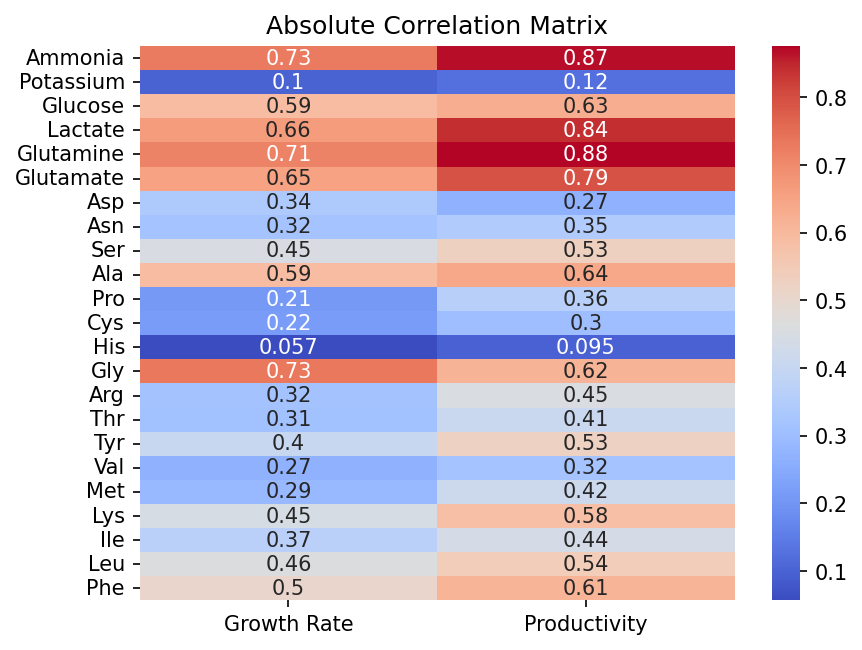

In [16]:
abs_corr = rates_data.drop(['Clone','Media','Day'], axis=1).corr().abs().iloc[0:2].drop(['Growth Rate','Productivity'], axis=1).T

plt.figure(dpi=150)
sns.heatmap(abs_corr, cmap='coolwarm', annot=True)
plt.title('Absolute Correlation Matrix')
plt.show()

In [17]:
X = rates_data[rates_data.columns[5:]]
y1 = rates_data['Growth Rate']
y2 = rates_data['Productivity']

In [18]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

pls_model1 = PLSRegression()
pls_model1.fit(X, y1)

pls_model2 = PLSRegression()
pls_model2.fit(X, y2)

PLSRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y1_pred = pls_model1.predict(X)
y2_pred = pls_model2.predict(X)

print('Growth Rate RMSE: ', np.sqrt(mean_squared_error(y1, y1_pred)))
print('Growth Rate R^2: ', r2_score(y1, y1_pred))
print('Productivity RMSE: ', np.sqrt(mean_squared_error(y2, y2_pred)))
print('Productivity R^2: ', r2_score(y2, y2_pred))

Growth Rate RMSE:  0.3328873546904934
Growth Rate R^2:  0.7078820075153112
Productivity RMSE:  3.950105297448734
Productivity R^2:  0.8684800850059319


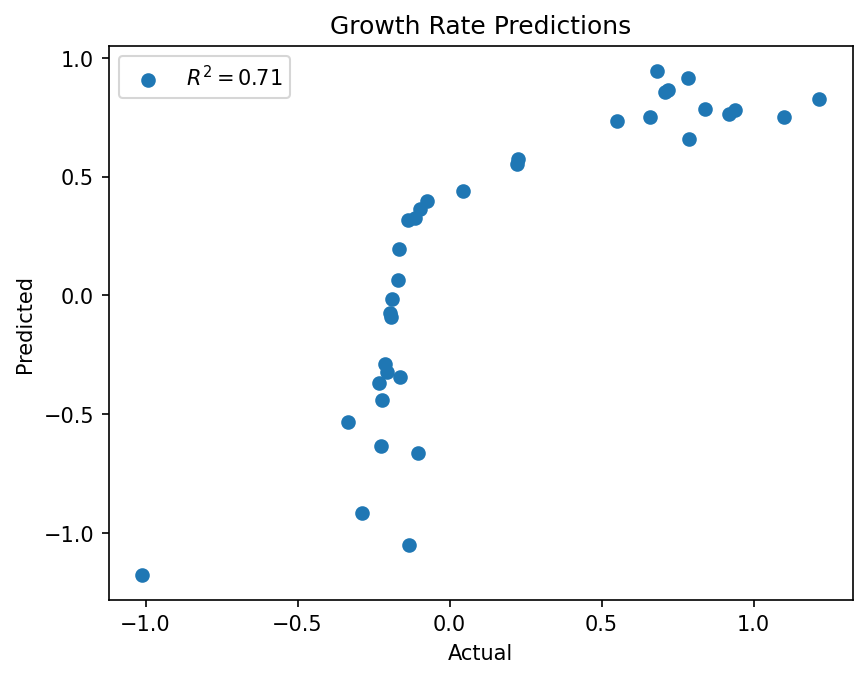

In [20]:
plt.figure(dpi=150)
plt.scatter(y=y1, x=y1_pred, label=f'$R^2 = ${r2_score(y1, y1_pred):.2f}')
plt.title('Growth Rate Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

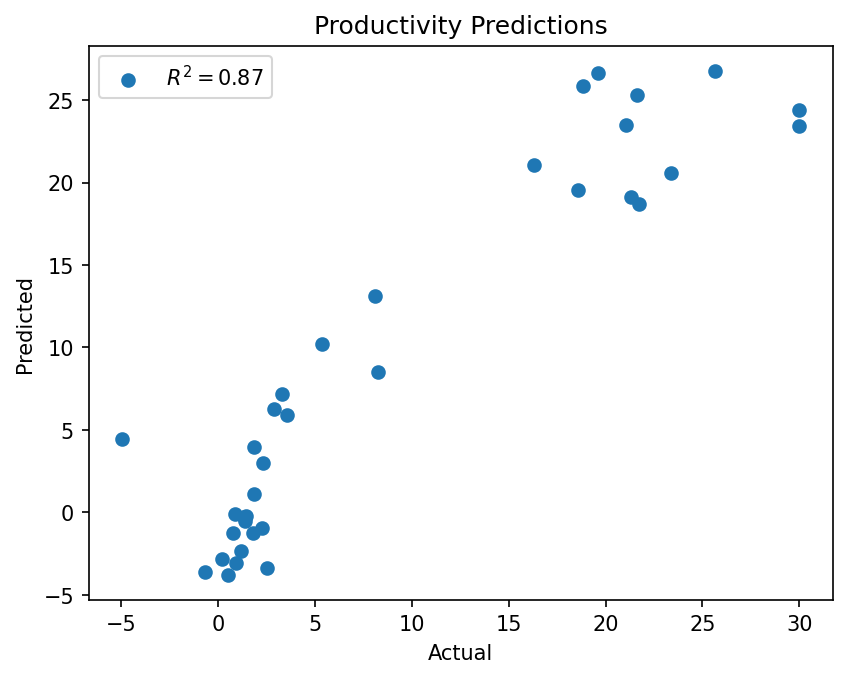

In [21]:
plt.figure(dpi=150)
plt.scatter(y=y2, x=y2_pred, label=f'$R^2 = ${r2_score(y2, y2_pred):.2f}')
plt.title('Productivity Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [22]:
def vip(x, y, model):
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_

    m, p = x.shape
    _, h = t.shape

    vips = np.zeros((p,))

    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)

    return vips

In [23]:
vip_growth_rate = vip(X, y1, pls_model1)
vip_productivity = vip(X, y2, pls_model2)

In [24]:
sorted_vip_growth_rate = np.argsort(vip_growth_rate)
sorted_vip_productivity = np.argsort(vip_productivity)

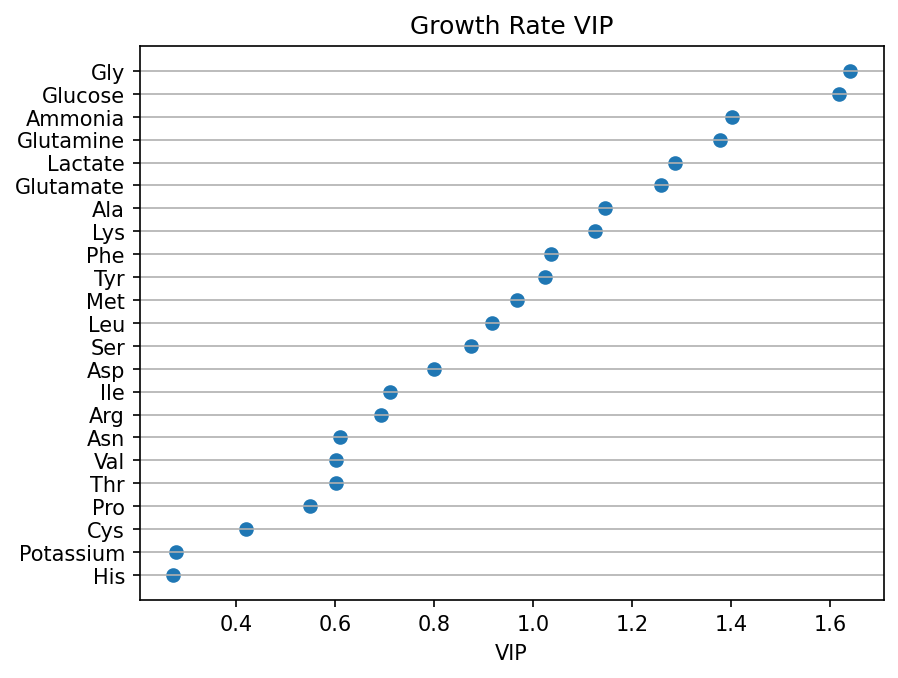

In [25]:
plt.figure(dpi=150)
plt.scatter(y=rates_data.columns[5:][sorted_vip_growth_rate], x=vip_growth_rate[sorted_vip_growth_rate])
plt.title('Growth Rate VIP')
plt.xlabel('VIP')
plt.grid(axis='y')
plt.show()

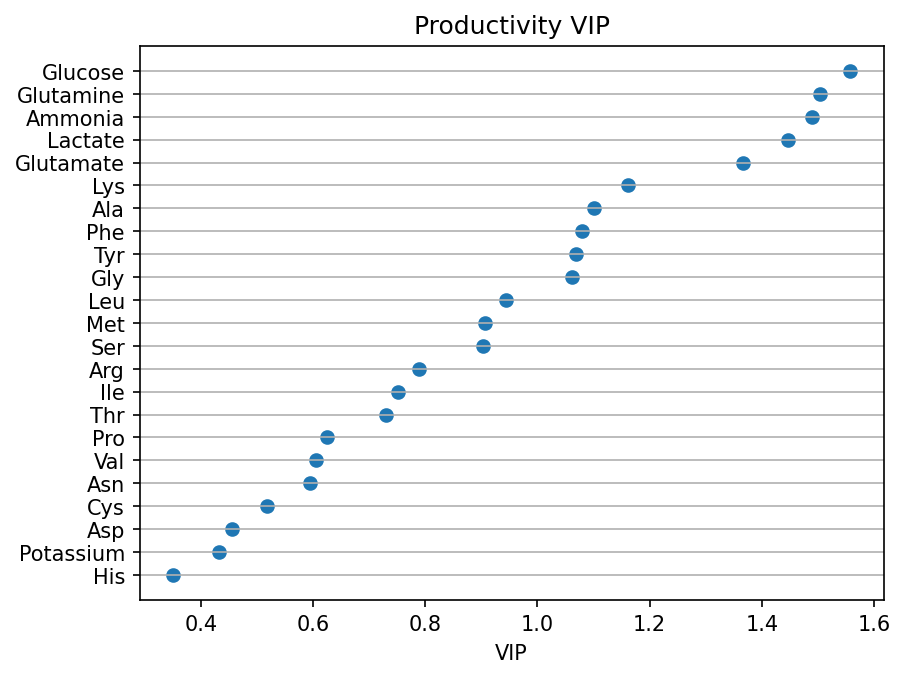

In [26]:
plt.figure(dpi=150)
plt.scatter(y=rates_data.columns[5:][sorted_vip_productivity], x=vip_productivity[sorted_vip_productivity])
plt.title('Productivity VIP')
plt.xlabel('VIP')
plt.grid(axis='y')
plt.show()

In [27]:
sorted_pls1_coefs = np.argsort(np.abs(pls_model1.coef_.reshape(-1)))[::-1]
sorted_pls2_coefs = np.argsort(np.abs(pls_model2.coef_.reshape(-1)))[::-1]

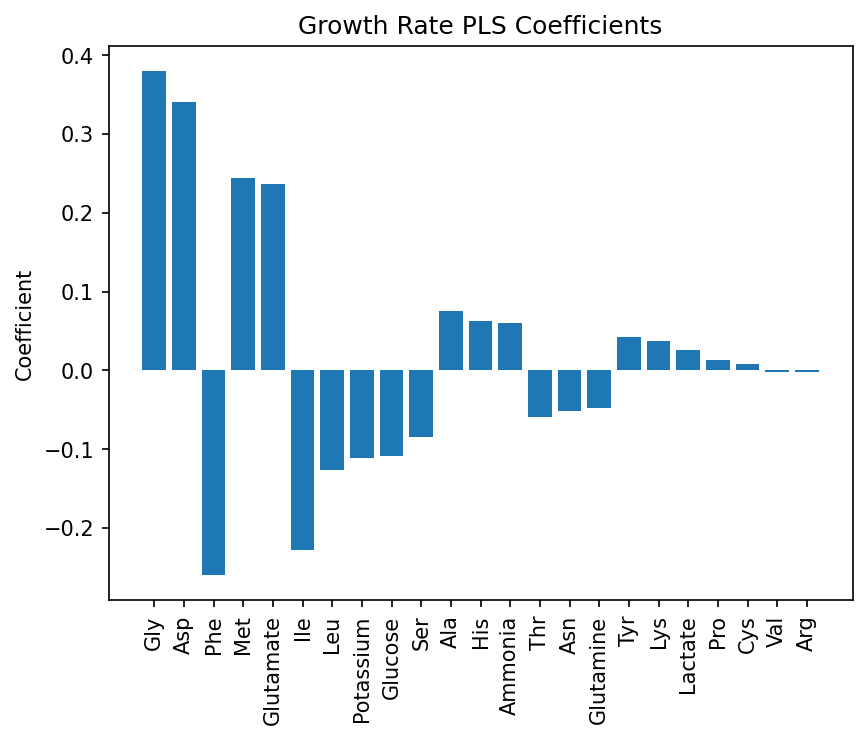

In [28]:
plt.figure(dpi=150)
plt.bar(x=rates_data.columns[5:][sorted_pls1_coefs], height=pls_model1.coef_.reshape(-1)[sorted_pls1_coefs])
plt.title('Growth Rate PLS Coefficients')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

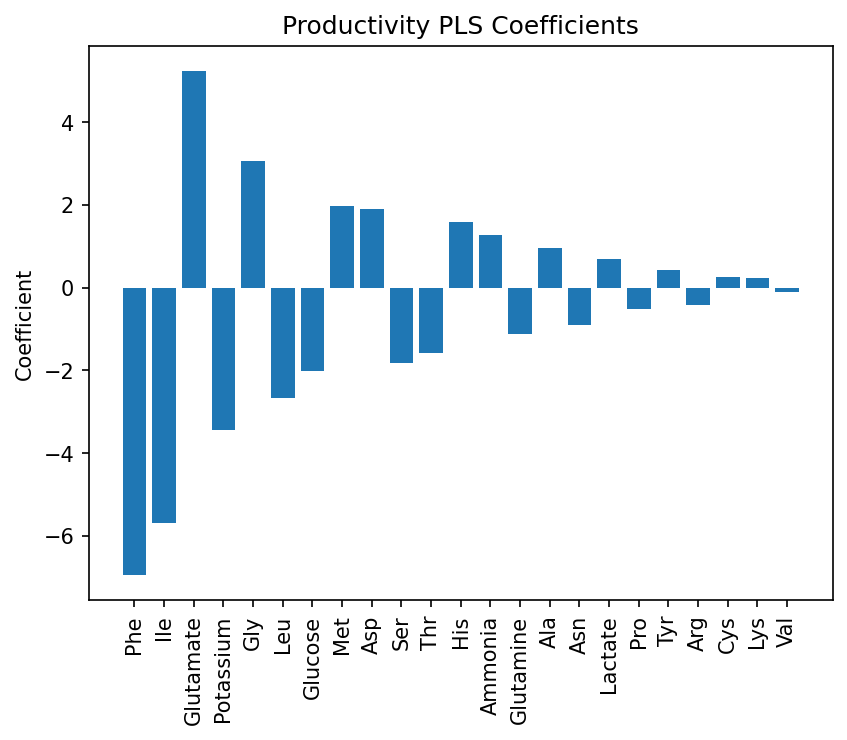

In [29]:
plt.figure(dpi=150)
plt.bar(x=rates_data.columns[5:][sorted_pls2_coefs], height=pls_model2.coef_.reshape(-1)[sorted_pls2_coefs])
plt.title('Productivity PLS Coefficients')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

In [30]:
vip_df = pd.DataFrame({'Component': rates_data.columns[5:], 'Growth Rate VIP': vip_growth_rate[sorted_vip_growth_rate], 'Productivity VIP': vip_productivity[sorted_vip_productivity]})
vip_df.set_index('Component', inplace=True)
vip_df

,Growth Rate VIP,Productivity VIP
Component,,
Ammonia,0.273066,0.351259
Potassium,0.278871,0.432167
Glucose,0.419193,0.455952
Lactate,0.548391,0.517595
Glutamine,0.601241,0.595517
Glutamate,0.601922,0.604521
Asp,0.609230,0.624272
Asn,0.692067,0.730525
Ser,0.710445,0.751957


In [31]:
coefficient_df = pd.DataFrame({'Component': rates_data.columns[5:], 'Growth Rate': pls_model1.coef_.reshape(-1), 'Productivity': pls_model2.coef_.reshape(-1)})
intercept_data = np.array([pls_model1.intercept_, pls_model2.intercept_])
coefficient_df.loc[len(coefficient_df)] = ['Intercept', intercept_data[0][0], intercept_data[1][0]]
coefficient_df.set_index('Component', inplace=True)

In [32]:
coefficient_df

,Growth Rate,Productivity
Component,,
Ammonia,0.060384,1.281181
Potassium,-0.111331,-3.439280
Glucose,-0.108234,-2.003884
Lactate,0.025643,0.697375
Glutamine,-0.047167,-1.127258
Glutamate,0.236562,5.232483
Asp,0.340785,1.896357
Asn,-0.051190,-0.914223
Ser,-0.084378,-1.811937
